<font color = 'Burly'>
<h1>TSF TASK : 2 Classification Using DT</h1>
</font>
<h3>Algorithm Used : Decision Tree Classifier </h3>
<h3>Difficulty : Intermediate </h3>

<font color = 'SandyBrown'>
<h3>Load the DataSet (IRIS)</h3>
</font>

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from IPython import display
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:\\Users\\hp\\downloads\\Iris.csv")
data.columns
data.dtypes
data.head(10)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa

<font color = 'SandyBrown'>
<h3>HEATMAP for correlation among the features</h3>
</font>

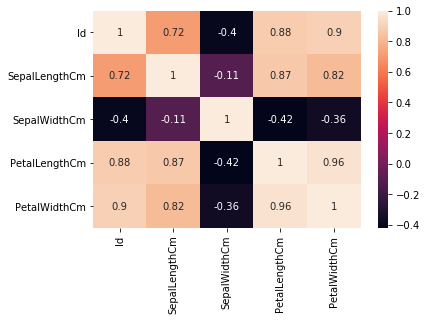

In [5]:
x=data.corr()
sns.heatmap(x,annot=True)

In [6]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
Sps = data.groupby(data.Species).Species.count()

<font color = 'LightBlue'>
<h3>Total Classes (Species)</h3>
</font>

In [8]:
Sps

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<font color = 'SandyBrown'>
<h3>Features for Predicting the Class Labels</h3>
</font>

In [9]:
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [10]:
X=data[cols]

<font color = 'SandyBrown'>
<h3>The Class Label</h3>
</font>

In [11]:
y=data['Species']

<font color = 'RebeccaPurple'>
<h3>Splitting up the Data</h3>
</font>

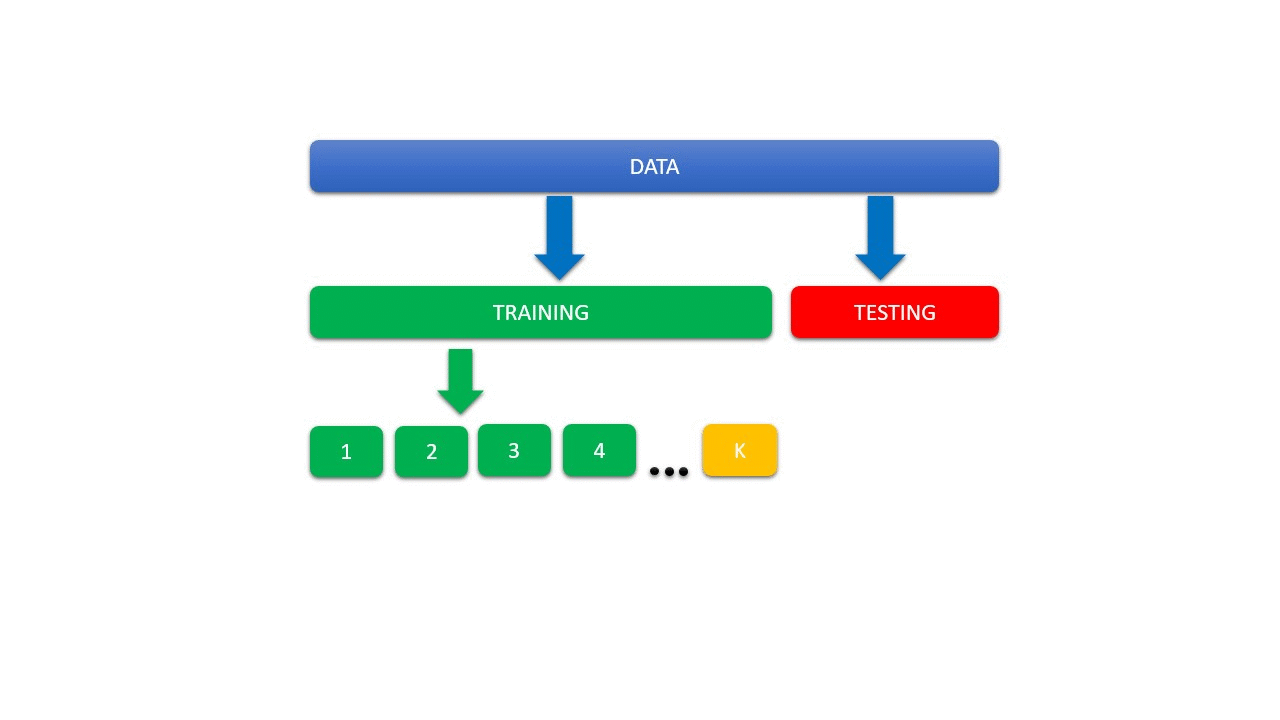

In [21]:
url="C:\\users\\hp\\desktop\\gifs\\split.gif"
display.Image(url)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=48)

<font color = 'SandyBrown'>
<h3>Implementing the Model</h3>
</font>

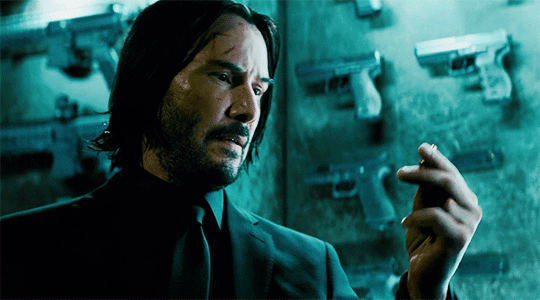

In [22]:
url="C:\\users\\hp\\desktop\\gifs\\wick.gif"
display.Image(url)

In [13]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

<font color = 'SandyBrown'>
<h3>Accuracy of the Model</h3>
</font>

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


<h3>Fixing some stuff here and installing certain libraries</h3>

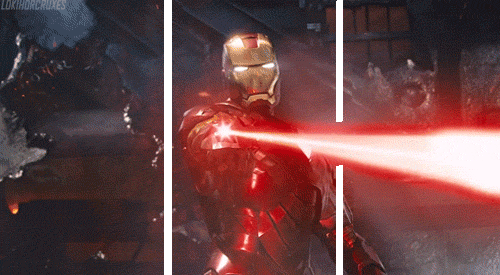

In [26]:
url="C:\\users\\hp\\desktop\\gifs\\fix.gif"
display.Image(url)

In [15]:
import sys
!{sys.executable} -m pip install pydotplus

In [13]:
import sys
!conda install --yes --prefix {sys.prefix} graphviz

Solving environment: ...working... done

# All requested packages already installed.



In [14]:
!pip install --user scikit-learn==0.20.3

In [12]:
!pip install graphviz

  Using cached graphviz-0.16-py2.py3-none-any.whl (19 kB)


In [14]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

<font color = 'SandyBrown'>
<h3>Visualizing the Decision Tree</h3>
</font>

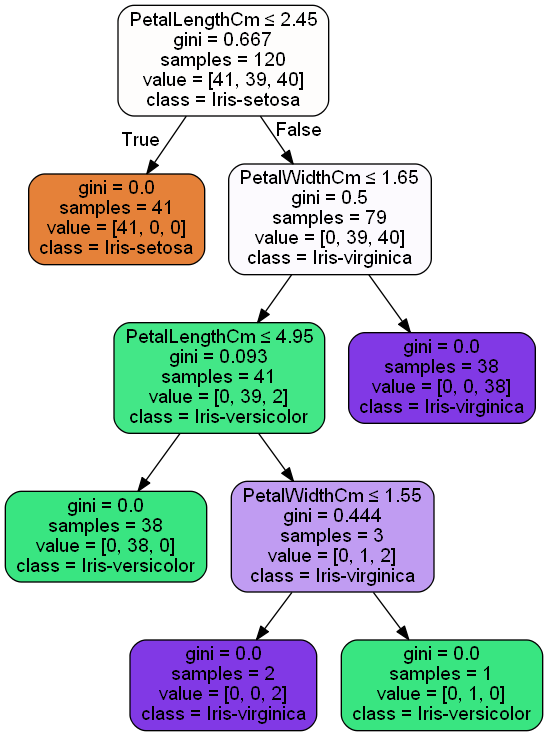

In [15]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = cols,class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())